<a href="https://colab.research.google.com/github/vedrocks15/Qiskit_Circuits/blob/master/PennyLane_Qiskit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pennylane
! pip install qiskit
! pip install qiskit-ibmq-provider

     |████████████████████████████████| 286kB 2.7MB/s 
     |████████████████████████████████| 6.7MB 2.6MB/s 
     |████████████████████████████████| 23.3MB 68.2MB/s 
     |████████████████████████████████| 163kB 49.0MB/s 
     |████████████████████████████████| 184kB 51.0MB/s 
     |████████████████████████████████| 1.9MB 16.9MB/s 
     |████████████████████████████████| 5.8MB 46.8MB/s 
     |████████████████████████████████| 768kB 29.4MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 51kB 302kB/s 
     |████████████████████████████████| 296kB 48.2MB/s 
     |████████████████████████████████| 71kB 9.5MB/s 
     |████████████████████████████████| 26.0MB 172kB/s 
     |████████████████████████████████| 573kB 44.5MB/s 
     |████████████████████████████████| 2.7MB 43.6MB/s 
  Created wheel for qiskit: filename=qiskit-0.19.6-cp36-none-any.whl size=3019 sha256=c6e98366f65c092b8f5451de59b22d19b14df8df371bacec88a6f9e0cb96891f
  Stored in dire

Qiskit Basics

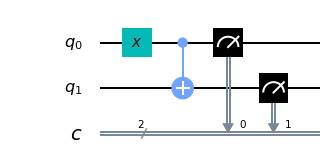

In [ ]:
import qiskit as q 
%matplotlib inline

circuit = q.QuantumCircuit(2,2) # 2 qubits & 2 classical bits

# Initial state qubit : |0> & |0>
# Initial state class :  0  &  0

# QUBit |0> is flipped by the NOT gate : |1>
circuit.x(0) # Result : |0>,|1>

# The first argument is the control bit in a CNOT Gate
# We passed qubit 0 
circuit.cx(0,1) # Result : |1>,|1>

# Breaking the superposition & the function maps the qubits to classical bits
circuit.measure([0,1],[0,1]) # [List of Qubits], [List of bits]

circuit.draw(output = 'mpl')

In [ ]:
from qiskit import IBMQ
from google.colab import files
files.upload()

Saving ibm_token.txt.txt to ibm_token.txt.txt


{'ibm_token.txt.txt': b'7ae84907f3ffc9f75dc2c2d167b5a89dc0307f8d8fbf0d05bb7b18e03ba4af8e72044e808f188f83792138e00e312dc0f567d1ce22d7960cfcf9185e7b03ed7a'}

Access only once while key uploading

In [ ]:
IBMQ.save_account(open("ibm_token.txt.txt","r").read())

Once keys are uploaded only use this

In [ ]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
# The account is from ibm-q hub to access backends
provider = IBMQ.get_provider("ibm-q")

# Setting up the backends on the site
for backend in provider.backends():
  try :
    qubit_cnt = len(backend.properties().qubits)
  except :
    qubit_cnt = "simulated" # since one is a simulator in the list on ibm-q
  print("Backend Name     : ",backend.name())
  print("Number of JOBS   : ",backend.status().pending_jobs)
  print("Number of QUBITS : ",qubit_cnt)
  print("#################################################")

Backend Name     :  ibmq_qasm_simulator
Number of JOBS   :  1
Number of QUBITS :  simulated
#################################################
Backend Name     :  ibmqx2
Number of JOBS   :  0
Number of QUBITS :  5
#################################################
Backend Name     :  ibmq_16_melbourne
Number of JOBS   :  58
Number of QUBITS :  15
#################################################
Backend Name     :  ibmq_vigo
Number of JOBS   :  4
Number of QUBITS :  5
#################################################
Backend Name     :  ibmq_ourense
Number of JOBS   :  1
Number of QUBITS :  5
#################################################
Backend Name     :  ibmq_london
Number of JOBS   :  1
Number of QUBITS :  5
#################################################
Backend Name     :  ibmq_burlington
Number of JOBS   :  1
Number of QUBITS :  5
#################################################
Backend Name     :  ibmq_essex
Number of JOBS   :  4
Number of QUBITS :  5
#####################

In [ ]:
from qiskit.tools.monitor import job_monitor
backend = provider.get_backend('ibmq_vigo')
# shots : number of times we want to send the circuit to qcomp
# similar to the concept of sampling
job = q.execute(circuit, backend = backend, shots = 500)
job_monitor(job)

Job Status: job has successfully run


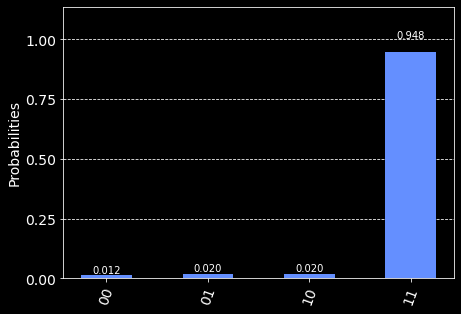

In [ ]:
from qiskit.visualization import plot_histogram
from matplotlib import style
style.use('dark_background')
result = job.result()
counts = result.get_counts(circuit)
# due to noise there are other answers like 00,01,10
plot_histogram([counts])

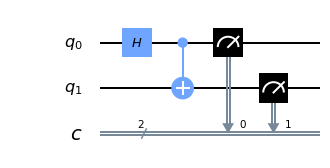

In [ ]:
circuit = q.QuantumCircuit(2,2)
# Initial |0> , |0>
circuit.h(0)    # Result : |0>, 1/1.4( |0> + |1> )
circuit.cx(0,1) # Result : 1/1.4( |00> + |11> )
circuit.measure([0,1],[0,1])
circuit.draw(output = "mpl")

In [ ]:
backend = provider.get_backend('ibmq_qasm_simulator') # simulator also exhibits some noise
# change the shots we get closer 0.5 probability distribution
job = q.execute(circuit, backend = backend, shots = 1000)
job_monitor(job)

Job Status: job has successfully run


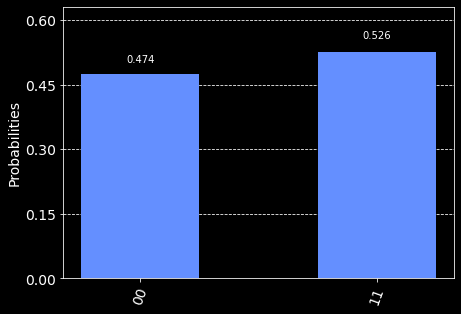

In [ ]:
result = job.result()
counts  = result.get_counts(circuit)
plot_histogram([counts]) 

In [ ]:
# offline simulation
from qiskit import Aer
bk = Aer.get_backend("qasm_simulator")
# Variety of backends
for b in Aer.backends():
  print(b)

qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


By changing the shots in the graph we sample at different values therefore the ideal case should be equal probabilties of |00> & |11> but we get slightly near 0.5

Job Status: job has successfully run


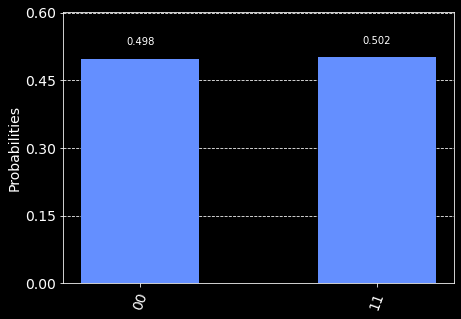

In [ ]:
job = q.execute(circuit, backend = bk, shots = 3000)
job_monitor(job)
r = job.result()
c = r.get_counts(circuit)
plot_histogram([c])

Quantum GATES 

In [ ]:
from qiskit.tools.visualization import plot_bloch_multivector # pre  measurement
from qiskit.tools.visualization import plot_histogram
from matplotlib import style
style.use("dark_background")
%matplotlib inline

# sv sim to simulate the bloc sphere
sv = q.Aer.get_backend("statevector_simulator")

# to get the probability distribution
qa = q.Aer.get_backend("qasm_simulator")

def do_job(c):
  # shots are not required in case of pre measurements
  job = q.execute(c, backend= sv).result()
  svc = job.get_statevector()

  n_qubits = c.n_qubits
  c.measure([i for i in range(n_qubits)],[i for i in range(len(c.clbits))])
  
  qa_job = q.execute(c,backend = qa,shots = 1024).result()
  counts = qa_job.get_counts()
  return svc,counts

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.


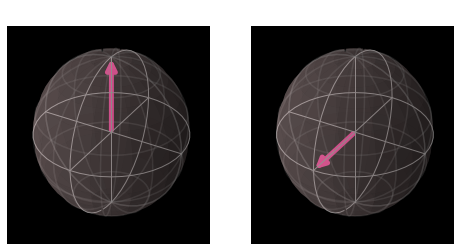

In [ ]:
c = q.QuantumCircuit(2,2)
c.h(1)
svc,counts = do_job(c)

plot_bloch_multivector(svc)